<a href="https://colab.research.google.com/github/flavianojr1/regressao-linear-aluguel/blob/main/regressao_linear_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [329]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [330]:
df.info() # Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Notamos que os dados estão em formatos numéricos, porém os campos **Valor_Aluguel** e **Valor_Condominio** por se tratarem de uma quantidade monetária, o ideal é estar em *float*.  
**Metragem** também é uma medida de área, e pode haver números decimais.

In [331]:
# Alterando valores monetários para float
df['Valor_Aluguel'] = df['Valor_Aluguel'].astype(float)
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)

# Alterando medidas de área para float
df['Metragem'] = df['Metragem'].astype(float)

df.info() # Conferindo o resultado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Valor_Aluguel     7203 non-null   float64
 1   Valor_Condominio  7203 non-null   float64
 2   Metragem          7203 non-null   float64
 3   N_Quartos         7203 non-null   int64  
 4   N_banheiros       7203 non-null   int64  
 5   N_Suites          7203 non-null   int64  
 6   N_Vagas           7203 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 394.0 KB


### Verificando por valores nulos

In [332]:
df.isnull().sum()

,0
Valor_Aluguel,0
Valor_Condominio,0
Metragem,0
N_Quartos,0
N_banheiros,0
N_Suites,0
N_Vagas,0


### Detectando dados duplicados

In [333]:
df.duplicated().sum() # Verificando dados duplicados

np.int64(598)

In [334]:
df.drop_duplicates(inplace=True) # Removendo dados duplicados
df.duplicated().sum() # Conferindo dados duplicados

np.int64(0)

O DataFrame não retornou dados nulos.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [335]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000
mean,3024.524905,829.178804,89.655413,2.305072,2.104164,1.020288,1.452990
std,3022.964453,811.521280,62.963890,0.833349,1.000631,0.888489,0.886046
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1400.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,600.000000,68.000000,2.000000,2.000000,1.000000,1.000000
75%,3400.000000,1000.000000,101.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000


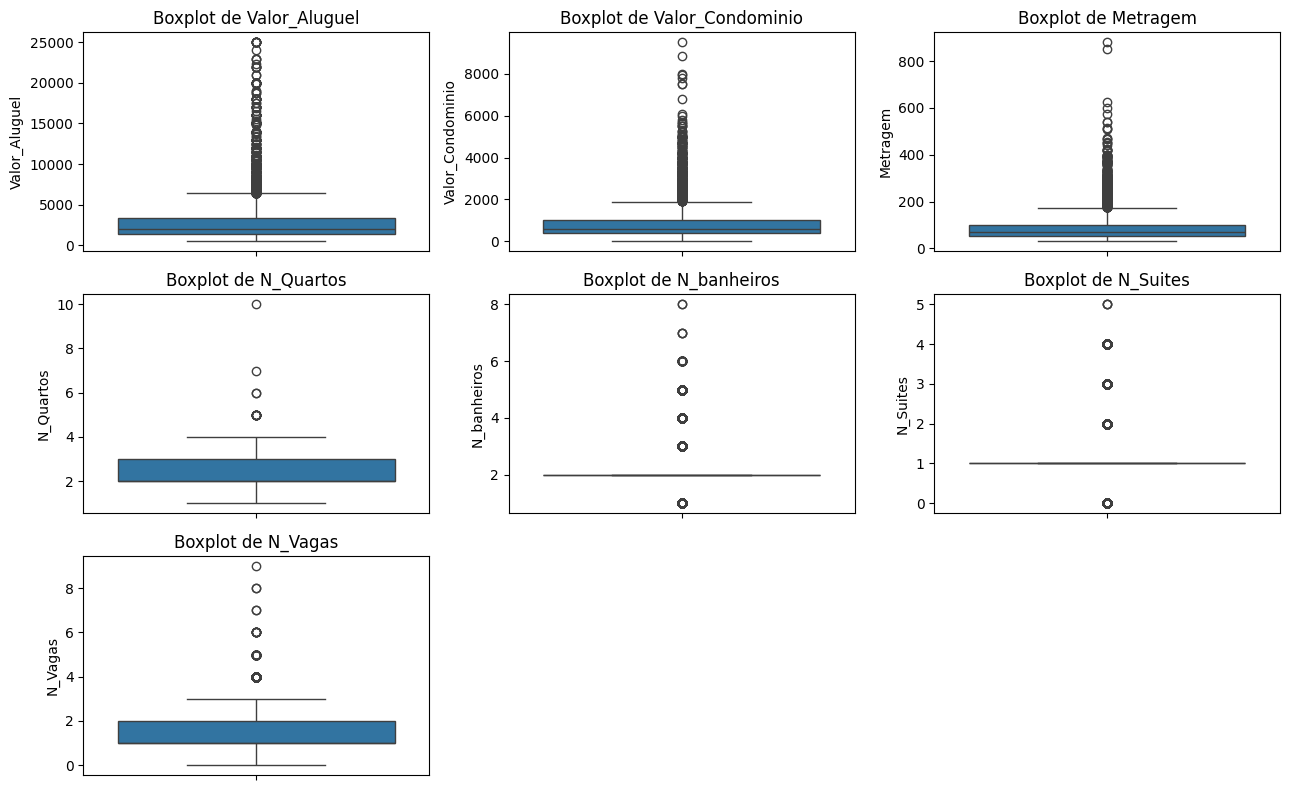

In [336]:
plt.figure(figsize=(13, 8)) # Configura uma imagem grande para análise

# Cria uma lista para iteração para plotar vários gráficos
colunas_numericas = [coluna for coluna in df.columns]

# Itera sobre cada coluna para plotar um boxplot
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.tight_layout()

plt.show()

Temos diversos outliers como observado acima.  
A primeira análise que vamos fazer é sobre a metragem.  
**Podemos notar alguns pontos vistos acima:**
- Temos uma grande distribuição de N_Vagas abaixo de 3
- Grande concentração de 2 N_banheiros
- A massiva maioria tem apenas 1 N_Suites
- Grande maioria para menos que 4 quartos
- Grande maioria para apartamentos menores que 200 metros

### Analisando Metragem por Valor_Aluguel

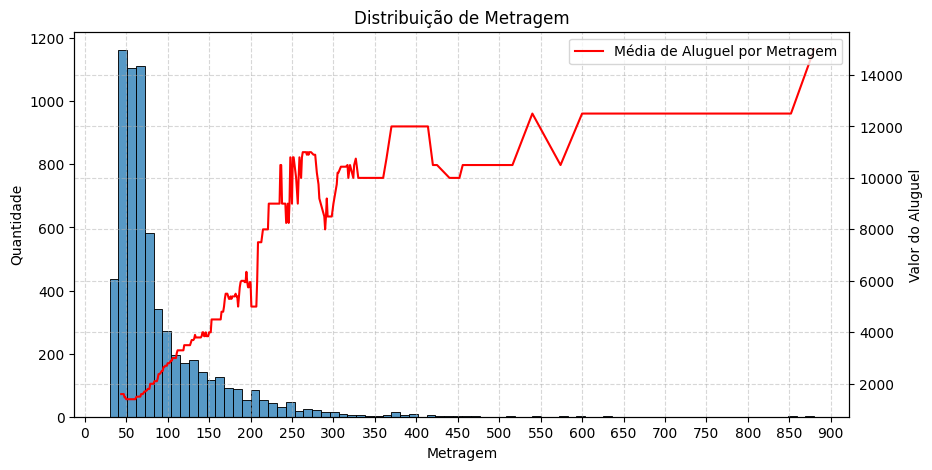

In [337]:
# Configurando para que o gráfico tenha dois tipos
fig, ax1 = plt.subplots(figsize=(10, 5))

# Histograma de 'Metragem'
sns.histplot(
    data=df,
    x='Metragem',
    bins=80,
    ax=ax1
)
# Configuração do gráfico histograma
ax1.set_xlabel('Metragem')
ax1.set_ylabel('Quantidade')
ax1.set_title('Distribuição de Metragem')

ax1.grid(True, axis='x', linestyle='--', alpha=0.5)
ax1.set_xticks(range(0, 1001, 50)) # Configura o intervalo de 50 em 50 para Metragem

# Plotando o segundo gráfico em cima do primeiro
ax2 = ax1.twinx()

# Suavizando a media de valores por metragem
media_aluguel_metragem = df.groupby('Metragem')['Valor_Aluguel'].median()
media_alguel_suavizada = media_aluguel_metragem.rolling(window=15).median()

# Plotando o segundo gráfico em cima do primeiro
ax2.plot(
    media_alguel_suavizada.index,
    media_alguel_suavizada.values,
    color='red',
    label='Média de Aluguel por Metragem'
)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_ylabel('Valor do Aluguel')
ax2.legend(loc='upper right')

fig.show()

In [338]:
print('Média de Aluguel para Metragem menor que 300: ', df[df['Metragem'] <= 300]['Valor_Aluguel'].mean())
print('Mediana de Aluguel para Metragem menor que 300: ', df[df['Metragem'] <= 300]['Valor_Aluguel'].median())
print('Média de Aluguel Geral: ', df['Valor_Aluguel'].mean())
print('Mediana de Aluguel Geral: ', df['Valor_Aluguel'].median())
print('Quantidade de linhas para Metragem maior que 300: ', df[df['Metragem'] >= 300].value_counts().sum())

Média de Aluguel para Metragem menor que 300:  2899.2300491098836
Mediana de Aluguel para Metragem menor que 300:  2000.0
Média de Aluguel Geral:  3024.524905374716
Mediana de Aluguel Geral:  2000.0
Quantidade de linhas para Metragem maior que 300:  97


Podemos notar que temos apenas 97 alugueis com metragem acima de 300 e pouco influencia na mediana/media ao filtrar para menores que 300 metros.  
Vamos analisar como fica os outliers e as distribuições filtrando para valores de 'Metragem' menores que 300.

In [339]:
df = df[df['Metragem'] <= 300]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000
mean,2899.230049,785.684162,85.493708,2.282382,2.071977,0.988950,1.418662
std,2755.459185,691.995497,50.982703,0.811886,0.956237,0.844576,0.824034
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1363.750000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,600.000000,67.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,972.000000,100.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,10.000000,7.000000,4.000000,9.000000


Ainda temos valores muito destoantes da média.  
Vamos analisar os valores de alugueis em relação o número de quartos.

### Analisando Imóveis por N_Quartos

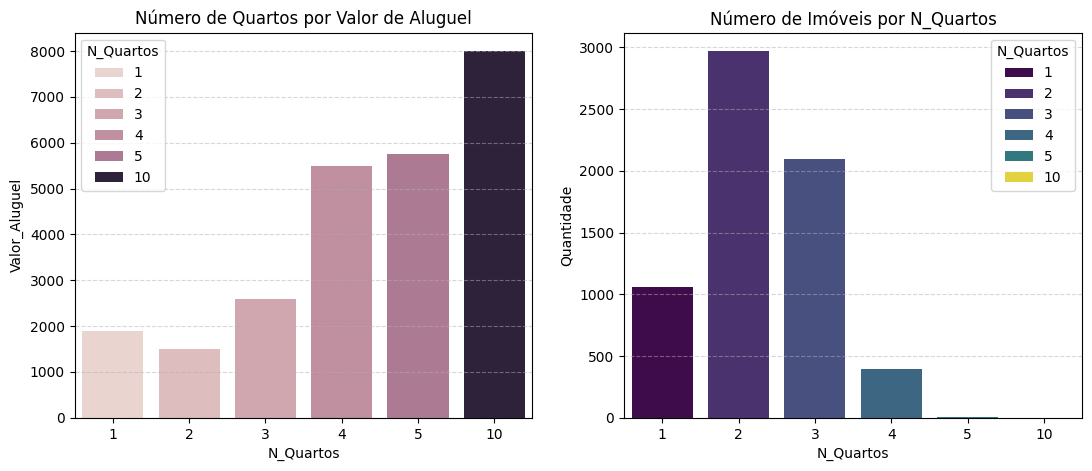

In [340]:
# Agrupando N_Quartos e exibindo a mediana de Valor_Aluguel
df_n_quartos = df.groupby('N_Quartos')['Valor_Aluguel'].median().reset_index()

# Plota 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Barplot de N_Quartos por Valor_Aluguel
sns.barplot(
    data=df_n_quartos,
    x='N_Quartos',
    y='Valor_Aluguel',
    hue='N_Quartos',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Quartos por Valor de Aluguel')

# Contagem de N_Quartos
sns.countplot(
    data=df,
    x='N_Quartos',
    ax=axes[1],
    hue='N_Quartos',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Quartos')
axes[1].set_ylabel('Quantidade')

plt.show()

- O valor de aluguel tende a crescer com mais quartos
- Os valores de alugueis são os mais altos para 10 quartos
- Não temos valores entre 5 e 10 quartos
- A maior quantidade está presente para 4 quartos ou menos
- Pouquíssimos imóveis estão listados para acima de 5 quartos

In [341]:
df = df[df['N_Quartos'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000
mean,2895.696974,785.418062,85.383658,2.279527,2.070650,0.987252,1.416679
std,2751.834501,691.946595,50.827708,0.803722,0.954535,0.842053,0.819178
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1360.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,600.000000,67.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,970.500000,100.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,7.000000,4.000000,9.000000


### Analisando Imóveis por N_banheiros

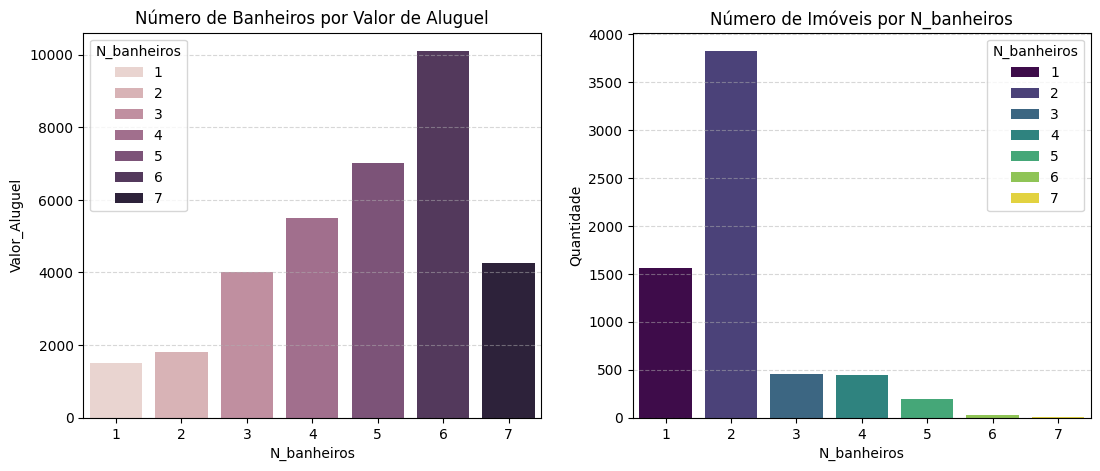

In [342]:
# Agrupa N_banheiros e exibe a mediana de Valor_Aluguel
df_n_banheiros = df.groupby('N_banheiros')['Valor_Aluguel'].median().reset_index()

# Plota 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Barplot de N_banheiros por Valor_Aluguel
sns.barplot(
    data=df_n_banheiros,
    x='N_banheiros',
    y='Valor_Aluguel',
    hue='N_banheiros',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Banheiros por Valor de Aluguel')

# Contagem de N_banheiros
sns.countplot(
    data=df,
    x='N_banheiros',
    ax=axes[1],
    hue='N_banheiros',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_banheiros')
axes[1].set_ylabel('Quantidade')

plt.show()

- Os valores mais altos de aluguel são para imóveis com 6 quartos
- A partir de 5 N_banheiros, a quantidade de Imóveis cai consideravelmente
- A grande concentração de banheiros está entre 1 e 2 N_banheiros
- Um pouco mais de 1000 imóveis entre 3 e 5 N_banheiros, não serão desconsiderados da análise

In [343]:
df = df[df['N_banheiros'] <= 5]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000
mean,2863.054604,778.959587,84.772019,2.273176,2.053370,0.976246,1.408144
std,2681.915239,683.552371,50.001313,0.799105,0.919427,0.826357,0.808399
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,597.000000,67.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,960.000000,98.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,9.000000


### Analisando Imóveis por N_Suites

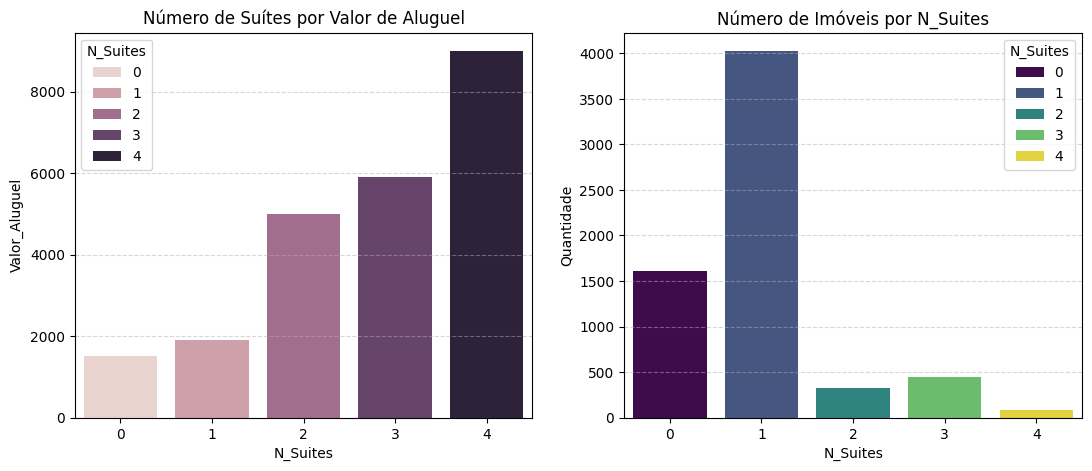

In [344]:
# Agrupa N_Suites e exibe a mediana de Valor_Aluguel
df_n_suites = df.groupby('N_Suites')['Valor_Aluguel'].median().reset_index()

# Configura 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Barplot de N_Suites por Valor_Aluguel
sns.barplot(
    data=df_n_suites,
    x='N_Suites',
    y='Valor_Aluguel',
    hue='N_Suites',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Suítes por Valor de Aluguel')

# Contagem de N_Suites
sns.countplot(
    data=df,
    x='N_Suites',
    ax=axes[1],
    hue='N_Suites',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Suites')
axes[1].set_ylabel('Quantidade')

plt.show()

- Existe um salto de preços do Valor_Aluguel para acima de 1 suítes
- A enorme concentração está entre 0 e 1 suíte
- Pouquíssimos apartamentos a partir de 2 suítes ou mais
- A quantidade de N_Suites somadas de 2, 3 4 suítes torna-se considerável na análise

In [345]:
df = df[df['N_Suites'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000
mean,2863.054604,778.959587,84.772019,2.273176,2.053370,0.976246,1.408144
std,2681.915239,683.552371,50.001313,0.799105,0.919427,0.826357,0.808399
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,597.000000,67.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,960.000000,98.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,9.000000


### Analisando Imóveis por N_Vagas


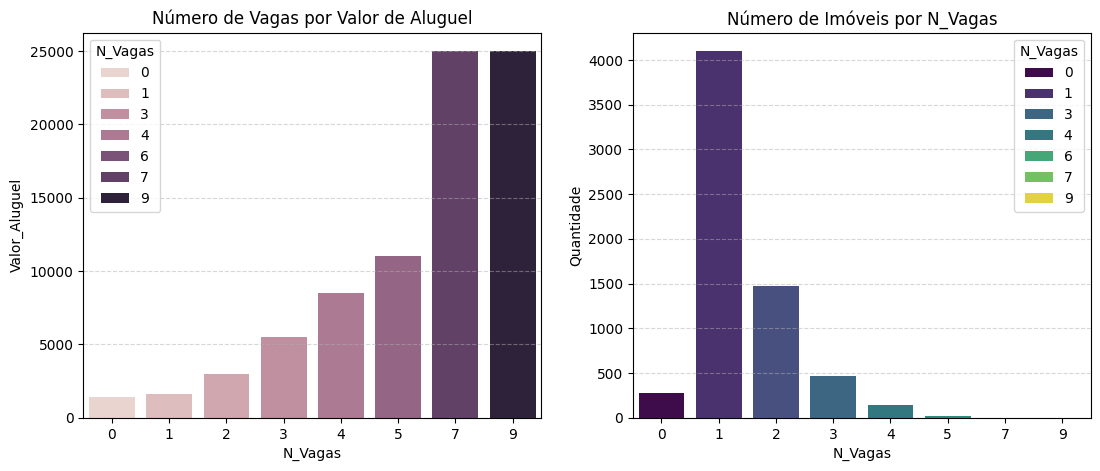

In [346]:
# Agrupa N_Vagas e exibe a mediana de Valor_Aluguel
df_n_vagas = df.groupby('N_Vagas')['Valor_Aluguel'].median().reset_index()

# Configura 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Gráfico de N_Vagas por Valor_Aluguel
sns.barplot(
    data=df_n_vagas,
    x='N_Vagas',
    y='Valor_Aluguel',
    hue='N_Vagas',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Vagas por Valor de Aluguel')

# Contagem de N_Vagas
sns.countplot(
    data=df,
    x='N_Vagas',
    ax=axes[1],
    hue='N_Vagas',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Vagas')
axes[1].set_ylabel('Quantidade')

plt.show()

- Valores crescentes de aluguel para números maiores de vagas
- Grande concentração para apenas 1 vaga
- A partir de 5 vagas ou mais, são poucos imóveis
- Será incluso na análise 4 vagas ou menos

In [347]:
df = df[df['N_Vagas'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,2832.366239,773.083707,84.271082,2.268915,2.046573,0.969519,1.396101
std,2601.092785,672.979067,49.219559,0.796214,0.911173,0.816970,0.778262
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,595.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,950.000000,98.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,4.000000


### Analisando Valor_Aluguel para o DataFrame Filtrado

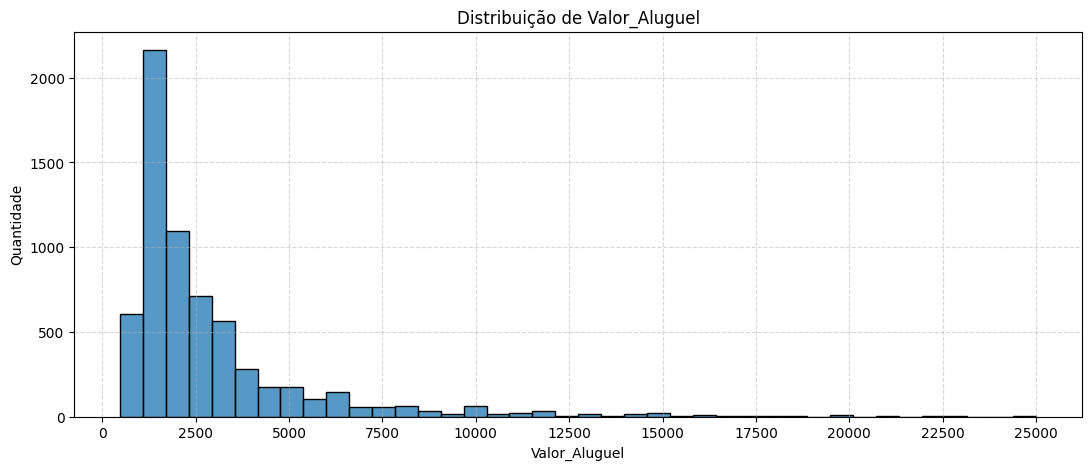

In [348]:
# Configura o tamanho do gráfico
plt.figure(figsize=(13, 5))

# Histograma de Valor_Aluguel para mostrar valores pequenos/zero
sns.histplot(
    data=df,
    x='Valor_Aluguel',
    bins=40
)

# Configuração de títulos e labels
plt.title('Distribuição de Valor_Aluguel')
plt.xlabel('Valor_Aluguel')
plt.ylabel('Quantidade')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(range(0, 25001, 2500))
# plt.yticks(range(0, 1151, 100))

plt.show()

- A massiva maioria está abaixo de Valor_Aluguel de 5000
- A partir de 5000 Valor_Aluguel, a quantidade se encontra decrescente
- Imóveis acima de 10000 tornam-se esparsos

In [349]:
# df_filtrado = df_filtrado[df_filtrado['Valor_Aluguel'] <= 8000]
# df = df_filtrado
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,2832.366239,773.083707,84.271082,2.268915,2.046573,0.969519,1.396101
std,2601.092785,672.979067,49.219559,0.796214,0.911173,0.816970,0.778262
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,400.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,595.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.000000,950.000000,98.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,4.000000


Não vamos filtrar a variável preditora e dependente, a título de rodar o modelo e verificar a precisão para uma gama maior de valores de alugueis (Valor_Aluguel)

### Verificando a mediana das variáveis inteiras

In [350]:
median_n_quartos = df['N_Quartos'].median()
median_n_banheiros = df['N_banheiros'].median()
median_n_suites = df['N_Suites'].median()
median_n_vagas = df['N_Vagas'].median()

print('A mediana de N_Quartos é: ', median_n_quartos)
print('A mediana de N_banheiros é: ', median_n_banheiros)
print('A mediana de N_Suites é: ', median_n_suites)
print('A mediana de N_Vagas é: ', median_n_vagas)

A mediana de N_Quartos é:  2.0
A mediana de N_banheiros é:  2.0
A mediana de N_Suites é:  1.0
A mediana de N_Vagas é:  1.0


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [351]:
correlacao = df.corr()
correlacao

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.667559,0.711097,0.369291,0.578098,0.581047,0.603922
Valor_Condominio,0.667559,1.000000,0.778283,0.473147,0.568382,0.556238,0.659370
Metragem,0.711097,0.778283,1.000000,0.684201,0.681481,0.669479,0.722857
N_Quartos,0.369291,0.473147,0.684201,1.000000,0.514932,0.495781,0.567290
N_banheiros,0.578098,0.568382,0.681481,0.514932,1.000000,0.915153,0.670777
N_Suites,0.581047,0.556238,0.669479,0.495781,0.915153,1.000000,0.681741
N_Vagas,0.603922,0.659370,0.722857,0.567290,0.670777,0.681741,1.000000


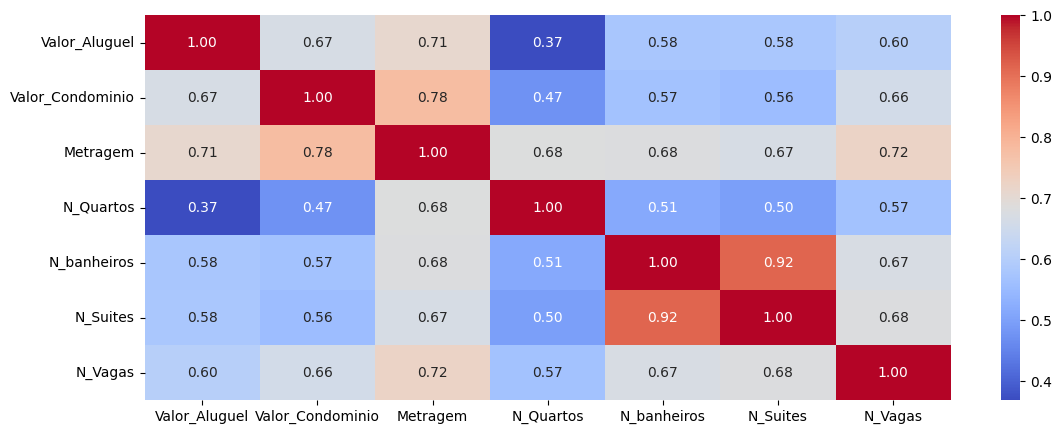

In [352]:
# Configurando tamanho do gráfico do Mapa de Calor
plt.figure(figsize=(13, 5))

sns.heatmap(
    data=correlacao,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.show()

- As maiores correlações com Valor_Aluguel são **Valor_Condominio** e **Metragem**
- O tamanho do Imóvel tem correlação positiva com o Valor do Aluguel
- Aluguéis mais caros tendem a ter condomínios mais caros
- N_banheiros e N_Suites influenciam mais que N_Quartos no Valor_Aluguel
- Imóveis com mais N_Vagas tendem a ter Valor_Aluguel mais caros


---


Como a grande maioria de quartos, banheiros, suítes e vagas está entre 2 e 1 no nosso df_filtrado, o que mais vai ter correlação com Valor_Aluguel realmente vai ser **Metragem** e **Valor_Condominio**


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [353]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [355]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4847, 6)
X_test shape:  (1616, 6)
y_train shape:  (4847,)
y_test shape:  (1616,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [356]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

# y_train não puxa nenhuma coluna pois ela já é a variável dependente Valor_Aluguel

# se você deu um nome diferente para x train e y train, altere no código.

In [357]:
regressao_valor_aluguel = LinearRegression()
regressao_valor_aluguel.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [358]:
print('Coeficiente angular: ', regressao_valor_aluguel.coef_)
print('Coeficiente linear: ', regressao_valor_aluguel.intercept_)

Coeficiente angular:  [37.48989592]
Coeficiente linear:  -322.4366407906318


Nossa equação seria: Valor_Aluguel = 37,49 * 'Metragem' -322,43

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [359]:
r2_quadrado = regressao_valor_aluguel.score(X, y)
print('R²: ', r2_quadrado)

R²:  0.5028211807579666


Com o **R² = 0.50**, o modelo linear simples mostra que quase 50% do valor do aluguel pode ser impactado pela metragem, porém muitos outros fatores influenciam no valor, sendo necessário uma regressão linear multipla.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

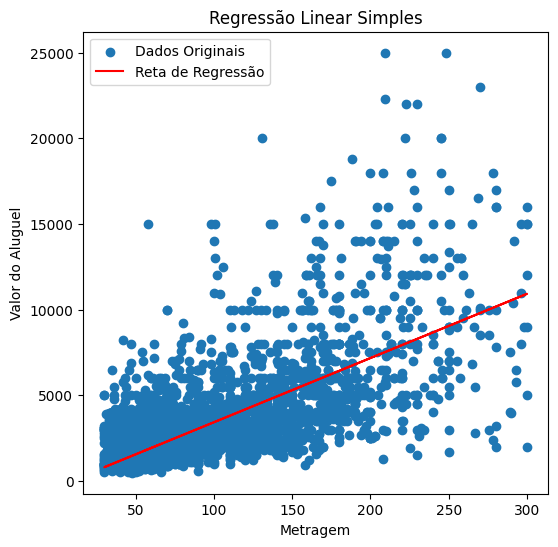

In [360]:
# Configura o tamanho do gráfico
plt.figure(figsize=(6, 6))

# Plota o gráfico de dispersão
plt.scatter(X, y, label='Dados Originais')

# Plota sobre os pontos de dispersão a reta de tendência
plt.plot(X, regressao_valor_aluguel.predict(X), color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples')
plt.legend()

plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [361]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [362]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5141453761593429


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Obtivemos dois valores muito próximos de R², tanto no teste quanto no treino. Com apenas alguns milésimos de diferença, podemos perceber que o modelo não está *overfitted*.  
  
No entanto, é importante destacar que o R² ainda é considerado baixo. Embora a metragem tenha influência sobre o valor do aluguel, é necessário incluir outras variáveis para construir um modelo mais preciso.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [363]:
# Selecionando as variáveis independentes
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]

# Separando a variável dependente e preditiva
y = df['Valor_Aluguel']

# Treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [364]:
regressao_aluguel_multipla = LinearRegression()
regressao_aluguel_multipla.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [365]:
r2_train = regressao_aluguel_multipla.score(X_train, y_train)
print('O coeficiente angular é: ', regressao_aluguel_multipla.coef_)
print('O coeficiente linear é: ', regressao_aluguel_multipla.intercept_)
print('O R quadrado é: ', regressao_aluguel_multipla.score(X_train, y_train))

O coeficiente angular é:  [ 6.73689118e-01  2.85195033e+01 -7.88449404e+02  2.23246446e+02
  3.06678016e+02  3.85098223e+02]
O coeficiente linear é:  408.9146546563543
O R quadrado é:  0.5770270002237585


No treino para a regressão linear múltipla, obtivemos um R² mais alto que o anterior.  
Isso prova que as outras variáveis, apesar de não tanto, auxiliam o modelo a entender melhor o Valor_Aluguel e se torna mais preciso do que considerar apenas uma variável.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [366]:
r2_test = regressao_aluguel_multipla.score(X_test, y_test)
r2_test

0.5968917377307922

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

A regressão linear múltipla resultou em um R² de 0.577 no treino, e no teste 0.5968, valores superiores a regressão linear simples.  
Isso indica que o modelo múltiplo consegue explicar melhor a variabilidade da variável dependente (alvo).  
Essa diferença sugere que as variáveis adicionais incluídas no modelo de regressão linear múltipla **são relevantes** e ajudam a explicar a variabilidade da variável alvo, demonstrando melhoria no desempenho.